In [165]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [166]:
im = cv2.imread(r'/Users/jooyong/github_locals/computer_vision/hw1/cameraman.tif', 0)

In [167]:
# float format image
print(im)
print(type(im))
print(im.shape)

[[156 159 158 ... 151 152 152]
 [160 154 157 ... 154 155 153]
 [156 159 158 ... 151 152 152]
 ...
 [114 132 123 ... 135 137 114]
 [121 126 130 ... 133 130 113]
 [121 126 130 ... 133 130 113]]
<class 'numpy.ndarray'>
(256, 256)


In [168]:
# normalize float format image
im_norm = (im-np.min(im))/(np.max(im)-np.min(im))
print(im_norm)
print(im_norm.shape)

[[0.60569106 0.61788618 0.61382114 ... 0.58536585 0.58943089 0.58943089]
 [0.62195122 0.59756098 0.6097561  ... 0.59756098 0.60162602 0.59349593]
 [0.60569106 0.61788618 0.61382114 ... 0.58536585 0.58943089 0.58943089]
 ...
 [0.43495935 0.50813008 0.47154472 ... 0.5203252  0.52845528 0.43495935]
 [0.46341463 0.48373984 0.5        ... 0.51219512 0.5        0.43089431]
 [0.46341463 0.48373984 0.5        ... 0.51219512 0.5        0.43089431]]
(256, 256)


In [169]:
length = im.shape[0]
width = im.shape[1]

In [170]:
# zero padding
pads = np.zeros((length+2, width+2))
pads[1:length+1,1:width+1] = im_norm
padded_im = pads

In [171]:
print(padded_im)
print(padded_im.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.60569106 0.61788618 ... 0.58943089 0.58943089 0.        ]
 [0.         0.62195122 0.59756098 ... 0.60162602 0.59349593 0.        ]
 ...
 [0.         0.46341463 0.48373984 ... 0.5        0.43089431 0.        ]
 [0.         0.46341463 0.48373984 ... 0.5        0.43089431 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(258, 258)


In [172]:
diff_along_y = im_norm.copy()

for row in range(256):
    for column in range(256):
        three_by_three = padded_im[row:row+3, column:column+3]
        current_p = three_by_three[1, 1]
        next_p = three_by_three[2, 1]

        change = abs(next_p - current_p)

        diff_along_y[row, column] = change

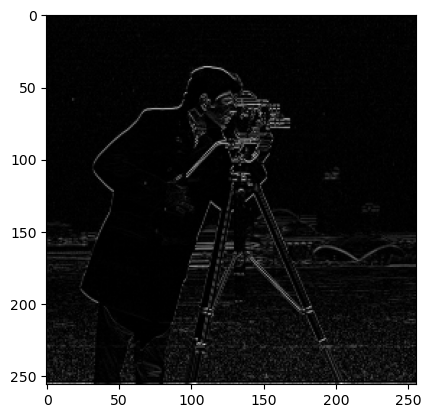

In [173]:
plt.imshow(diff_along_y, cmap='gray')

In [174]:
diff_along_x = im_norm.copy()

for row in range(256):
    for column in range(256):
        three_by_three = padded_im[row:row+3, column:column+3]
        current_p = three_by_three[1, 1]
        next_p = three_by_three[1, 2]

        change = abs(next_p - current_p)

        diff_along_x[row, column] = change

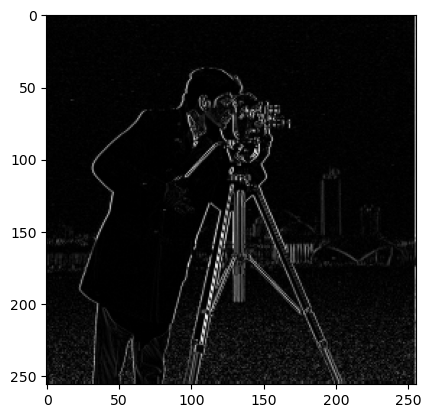

In [175]:
plt.imshow(diff_along_x, cmap='gray')